# Dependencies

In [1]:
Sys.setlocale(category = "LC_ALL", locale = "en_US.UTF-8")

[1] "en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/C"

In [2]:
library(randomcoloR)
library(ggsankey)
library(dplyr)
library(ComplexHeatmap)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: grid

ComplexHeatmap version 2.14.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




# Functions

In [3]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Misc_functions.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/clonetrack.R")

Loading required package: ggalluvial



# Paths

In [6]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [7]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

In [8]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

In [9]:
meta_div <- meta_div[ !is.na(meta_div$TRB),]

In [10]:
dim(meta_div)

[1] 504  66

In [11]:
table(meta_div$Disease_type)


  ALCL    ALL    AML   ARMS     BL    BLL    CML  DLBCL   ERMS    EWS     HB 
     9     99     45      6     23     10     13     12     23     34     16 
    HD HR ALL    LFS  MS NB     NB Normal     OS  PMBCL SR ALL  T-ALL  WILMS 
    38     53     10      1     13     14     48      8      7     16      6 

In [12]:
colnames(meta_div)

[1] "sample_id"          "Patient"            "cycle"             
 [4] "FOLD"               "ATC"                "Age"               
 [7] "Disease_type"       "TE_fold"            "CD3"               
[10] "EM"                 "CM"                 "Naïve"             
[13] "SCM"                "TE"                 "EM%"               
[16] "CM%"                "Naïve%"             "SCM%"              
[19] "TE%"                "Naïve/TE"           "N+CM+SCM/TE+EM"    
[22] "PD-1"               "PDL1"               "LAG3"              
[25] "TIM3"               "CTLA4"              "PD1%"              
[28] "PDL1%"              "LAG3%"              "TIM3%"             
[31] "CTLA4%"             "Any NCR"            "PD1 + LAG3 + TIM3" 
[34] "cancergroup"        "agegroup"           "foldgroup"         
[37] "Remission"          "Relapse"            "Transplant"        
[40] "CART"               "vital_status"       "LOF"               
[43] "TRB"                "Reads"              "CPKR"              
[46] "Average_reads"      "VMR"                "Max_reads"         
[49] "Singletons"         "Doubletons"         "qD"                
[52] "Sample_Coverage"    "observed_Richness"  "estimated_Richness"
[55] "SE_Richeness"       "observed_Shannon"   "estimated_Shannon" 
[58] "SE_Shannon"         "observed_Simpson"   "estimated_Simpson" 
[61] "SE_Simpson"         "basename"           "file"              
[64] "sampletype"         "Group"              "log10shann"

In [13]:
table(meta_div$sampletype[!meta_div$cancergroup %in% c("LFS", "Normal")])


cfDNA  PBMC Tumor 
  266   197    17 

In [14]:
dim(meta_div[meta_div$Group == "CHP" & meta_div$cancergroup != "Normal", c("file", "cancergroup", "sampletype")])

[1] 480   3

In [15]:
# remove LFS and Normal
meta_div <- meta_div[meta_div$Disease_type != "LFS",]
meta_div <- meta_div[meta_div$Disease_type != "Normal",]

In [16]:
meta_div[ meta_div$Patient == "CHP_394",1:20]

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,CM,Naïve,SCM,TE,EM%,CM%,Naïve%,SCM%,TE%,Naïve/TE
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
673,CHP_394_01,CHP_394,X01,6.2,101.20,17,ERMS,6.2,835,0,115,433,27,260,0.00000,13.772455,51.856287,3.2335329,31.13772,1.66538462
676,CHP_394_04,CHP_394,X04,0.7,140.70,17,ERMS,0.7,2194,280,809,58,2,1045,12.76208,36.873291,2.643573,0.0911577,47.62990,0.05550239
202,CHP_394_02,CHP_394,X02,0.7,235.04,17,ERMS,0.7,712,0,20,97,70,525,0.00000,2.808989,13.623596,9.8314607,73.73596,0.18476190
203,CHP_394_04,CHP_394,X04,0.7,140.70,17,ERMS,0.7,2194,280,809,58,2,1045,12.76208,36.873291,2.643573,0.0911577,47.62990,0.05550239
204,CHP_394_05,CHP_394,X05,0.7,394.40,17,ERMS,0.7,295,35,180,0,0,80,11.86441,61.016949,0.000000,0.0000000,27.11864,0.00000000
3761,CHP_394_01,CHP_394,X00,6.2,101.20,17,ERMS,6.2,835,0,115,433,27,260,0.00000,13.772455,51.856287,3.2335329,31.13772,1.66538462


In [17]:
meta_div[ meta_div$Patient == "CHP_387",c("Patient", "cycle", "sampletype", "TRB", "Reads", "file")]

,Patient,cycle,sampletype,TRB,Reads,file
,<chr>,<chr>,<chr>,<int>,<int>,<chr>
638,CHP_387,X01,PBMC,279,14179,batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_387-01-PBMC-DNA.txt
640,CHP_387,X03,PBMC,58,343,batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_387-03_PBMC_DNA.txt
173,CHP_387,X01,cfDNA,5,15263,batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_387-01_cfDNA.txt
174,CHP_387,X02,cfDNA,4,1749,remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_387-02_cfDNA.txt
175,CHP_387,X03,cfDNA,10,8141,batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_387-03_cfDNA.txt


# Some decriptives

In [18]:
meta_div[ meta_div$Patient == "CHP_387",c("Patient", "cycle", "sampletype", "TRB", "Reads", "file")]

,Patient,cycle,sampletype,TRB,Reads,file
,<chr>,<chr>,<chr>,<int>,<int>,<chr>
638,CHP_387,X01,PBMC,279,14179,batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_387-01-PBMC-DNA.txt
640,CHP_387,X03,PBMC,58,343,batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_387-03_PBMC_DNA.txt
173,CHP_387,X01,cfDNA,5,15263,batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_387-01_cfDNA.txt
174,CHP_387,X02,cfDNA,4,1749,remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_387-02_cfDNA.txt
175,CHP_387,X03,cfDNA,10,8141,batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_387-03_cfDNA.txt


In [19]:
dim(meta_div)

[1] 480  66

In [20]:
table(meta_div$Group)


CHP 
480 

In [21]:
allTCRs <- sum(meta_div$TRB)

In [22]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/"

In [23]:
colnames(meta_div)

[1] "sample_id"          "Patient"            "cycle"             
 [4] "FOLD"               "ATC"                "Age"               
 [7] "Disease_type"       "TE_fold"            "CD3"               
[10] "EM"                 "CM"                 "Naïve"             
[13] "SCM"                "TE"                 "EM%"               
[16] "CM%"                "Naïve%"             "SCM%"              
[19] "TE%"                "Naïve/TE"           "N+CM+SCM/TE+EM"    
[22] "PD-1"               "PDL1"               "LAG3"              
[25] "TIM3"               "CTLA4"              "PD1%"              
[28] "PDL1%"              "LAG3%"              "TIM3%"             
[31] "CTLA4%"             "Any NCR"            "PD1 + LAG3 + TIM3" 
[34] "cancergroup"        "agegroup"           "foldgroup"         
[37] "Remission"          "Relapse"            "Transplant"        
[40] "CART"               "vital_status"       "LOF"               
[43] "TRB"                "Reads"              "CPKR"              
[46] "Average_reads"      "VMR"                "Max_reads"         
[49] "Singletons"         "Doubletons"         "qD"                
[52] "Sample_Coverage"    "observed_Richness"  "estimated_Richness"
[55] "SE_Richeness"       "observed_Shannon"   "estimated_Shannon" 
[58] "SE_Shannon"         "observed_Simpson"   "estimated_Simpson" 
[61] "SE_Simpson"         "basename"           "file"              
[64] "sampletype"         "Group"              "log10shann"

In [29]:
int_all_list <- list()

for (i in 1:nrow(meta_div)) {
    fle <- meta_div[i, "file"]
    sample <- meta_div[i, "basename"]
    pat <- meta_div[i, "Patient"]
    sampletype <- meta_div[i, "sampletype"]

    onefle <- read.table(paste0(h4hpath, fle), sep = "\t", header = TRUE, stringsAsFactors = F)
    # Remove non-productive
    onefle <- onefle[!grepl("_", onefle$aaSeqCDR3), ]
    onefle <- onefle[!grepl("[*]", onefle$aaSeqCDR3), ]
    # next if the file has no productive cdr3
    if (nrow(onefle) == 0) {
        next
    }
    onefle$file <- fle
    onefle$basename <- sample
    onefle$Patient <- pat
    onefle$sampletype <- sampletype
    int_all_list[length(int_all_list) + 1] <- list(onefle)
}
int_all <- do.call("rbind", int_all_list)


In [30]:
dim(int_all)

[1] 53686    39

In [31]:
head(int_all)

,cloneId,cloneCount,cloneFraction,clonalSequence,clonalSequenceQuality,allVHitsWithScore,allDHitsWithScore,allJHitsWithScore,allCHitsWithScore,allVAlignments,...,aaSeqFR2,aaSeqCDR2,aaSeqFR3,aaSeqCDR3,aaSeqFR4,refPoints,file,basename,Patient,sampletype
,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<lgl>,<lgl>,<lgl>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,37,13,0.15116279,TGTGCCAGCAGGGAAAGGATAGCCCCTGGAAACACCATATATTTT,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,TRBV6-5*00(726.3),,TRBJ1-3*00(130),NA,519|530|556|0|11||55.0,...,NA,NA,NA,CASRERIAPGNTIYF,NA,:::::::::0:-6:11:::::25:-2:45:::,batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_319-05-PBMC-DNA.txt,CHP_319-05-PBMC-DNA,CHP_319,PBMC
2,42,11,0.12790698,TGCAGTGCTAGAGATCGTACGGGAATGTCCACAGATACGCAGTATTTT,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,TRBV20-1*00(703.5),"TRBD1*00(25),TRBD2*00(25)",TRBJ2-3*00(110),NA,759|775|793|0|16||80.0,...,NA,NA,NA,CSARDRTGMSTDTQYF,NA,:::::::::0:2:16:19:1:-8:24:29:-2:48:::,batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_319-05-PBMC-DNA.txt,CHP_319-05-PBMC-DNA,CHP_319,PBMC
3,48,9,0.10465116,TGTGCCAGTAGGCTCGGGACAGGGCATGAGAACACTGAAGCTTTCTTT,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,TRBV19*00(373.2),TRBD1*00(50),TRBJ1-1*00(235),NA,559|570|596|0|11||55.0,...,NA,NA,NA,CASRLGTGHENTEAFF,NA,:::::::::0:-6:11:14:1:-3:24:29:-1:48:::,batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_319-05-PBMC-DNA.txt,CHP_319-05-PBMC-DNA,CHP_319,PBMC
4,50,9,0.10465116,TGTGCCACCAGCAGAGATTGGACAGTCTCCTACGAGCAGTACTTC,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,TRBV15*00(439),TRBD1*00(30),TRBJ2-7*00(235),NA,552|570|589|0|18||90.0,...,NA,NA,NA,CATSRDWTVSYEQYF,NA,:::::::::0:1:18:19:-1:-5:25:26:0:45:::,batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_319-05-PBMC-DNA.txt,CHP_319-05-PBMC-DNA,CHP_319,PBMC
5,63,6,0.06976744,TGTGCCAGCAGCCGAAACAGGGTTAGGTATGGCTACACCTTC,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,TRBV11-2*00(299),TRBD1*00(30),TRBJ1-2*00(215),NA,522|534|559|0|12||60.0,...,NA,NA,NA,CASSRNRVRYGYTF,NA,:::::::::0:-5:12:16:-3:-3:22:27:-5:42:::,batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_319-05-PBMC-DNA.txt,CHP_319-05-PBMC-DNA,CHP_319,PBMC
7,71,5,0.05813953,TGTGCCAGCAGCAAAGATGTCCTAGGGGATAGCTCCTATAATTCACCCCTCCACTTT,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,TRBV21-1*00(1009),TRBD1*00(25),TRBJ1-6*00(275),NA,544|560|581|0|16||80.0,...,NA,NA,NA,CASSKDVLGDSSYNSPLHF,NA,:::::::::0:-1:16:17:6:-13:22:30:2:57:::,batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_319-05-PBMC-DNA.txt,CHP_319-05-PBMC-DNA,CHP_319,PBMC


In [32]:
allTCRs <- nrow(int_all)
# uniqueTCRs <- length(unique(int_all$aaSeqCDR3))

In [33]:
dups <- int_all[duplicated(int_all$aaSeqCDR3),]

In [34]:
allTCRs # total TCRs

[1] 53686

In [35]:
dim(int_all[!duplicated(int_all$aaSeqCDR3),]) # total unique TCRs

[1] 50514    39

In [36]:
head(dups)

,cloneId,cloneCount,cloneFraction,clonalSequence,clonalSequenceQuality,allVHitsWithScore,allDHitsWithScore,allJHitsWithScore,allCHitsWithScore,allVAlignments,...,aaSeqFR2,aaSeqCDR2,aaSeqFR3,aaSeqCDR3,aaSeqFR4,refPoints,file,basename,Patient,sampletype
,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<lgl>,<lgl>,<lgl>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>
16,91,1,0.0116279070,TGTGCCAGCAGCCAGGAACACGCTAGCGGGGGGAGGTTAGATACGCAGTATTTT,EEEEAEEEEEEAEEEEEEEEEEEE<EEEEEEEEEEEEEEEEEEEAEEEEEEEEE,"TRBV3-1*00(539),TRBV3-2*00(491)",TRBD2*00(40),TRBJ2-3*00(220),NA,543|557|580|0|14||70.0;543|557|580|0|14||70.0,...,NA,NA,NA,CASSQEHASGGRLDTQYF,NA,:::::::::0:-3:14:22:-4:-4:30:38:-5:54:::,batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_319-05-PBMC-DNA.txt,CHP_319-05-PBMC-DNA,CHP_319,PBMC
192,1324,1,0.0004017678,TGCAGCGTTGAAGATCATGCTAGCGGGATTAGAGATACACAGTATTTT,EAEEAEEAEEEEEEEEAEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,TRBV29-1*00(1245),TRBD2*00(45),TRBJ2-3*00(97),NA,700|716|734|0|16||80.0,...,NA,NA,NA,CSVEDHASGIRDTQYF,NA,:::::::::0:2:16:19:-4:-3:28:32:-5:48:::,batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_323-05-PBMC-DNA.txt,CHP_323-05-PBMC-DNA,CHP_323,PBMC
199,1367,1,0.0004017678,TGCAGCGTTGTGGCGGGGGGGCGAAATACACAGTATTTT,EEEEEEEEEEEEEEAEEEEEEEEEEEEEEAAEEEEEEEE,TRBV29-1*00(1244),"TRBD1*00(35),TRBD2*00(34)",TRBJ2-3*00(103),NA,700|710|734|0|10||50.0,...,NA,NA,NA,CSVVAGGRNTQYF,NA,:::::::::0:-4:10:16:-6:1:23:25:-7:39:::,batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_323-05-PBMC-DNA.txt,CHP_323-05-PBMC-DNA,CHP_323,PBMC
10310,985,181,0.0030282244,TGCGCCAGCAGCTTGGAGGGGGATCAGCCCCAGCATTTT,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,TRBV5-1*00(578.1),TRBD1*00(30),TRBJ1-5*00(222),NA,554|570|590|0|16||80.0,...,NA,NA,NA,CASSLEGDQPQHF,NA,:::::::::0:0:16:16:-5:-1:22:22:-5:39:::,remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_324-05_PBMC-DNA.txt,CHP_324-05_PBMC-DNA,CHP_324,PBMC
247,1474,26,0.0004349936,TGTGCCAGCAGTTTCCCATTCGGGACAGGGTCGAATTCACCCCTCCACTTT,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,TRBV28*00(150),TRBD1*00(50),TRBJ1-6*00(209.8),NA,564|578|601|0|14||70.0,...,NA,NA,NA,CASSFPFGTGSNSPLHF,NA,:::::::::0:-3:14:20:1:-3:30:33:-7:51:::,remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_324-05_PBMC-DNA.txt,CHP_324-05_PBMC-DNA,CHP_324,PBMC
255,1505,21,0.0003513410,TGTGCCAGCAGCTTTTCGGGAGGGTCGTCTGAAGCTTTCTTT,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,"TRBV11-1*00(591.9),TRBV11-2*00(574.9)",TRBD2*00(40),TRBJ1-1*00(210),NA,531|545|568|0|14||70.0;522|536|559|0|14||70.0,...,NA,NA,NA,CASSFSGGSSEAFF,NA,:::::::::0:-3:14:16:-8:0:24:28:-6:42:::,remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_324-05_PBMC-DNA.txt,CHP_324-05_PBMC-DNA,CHP_324,PBMC


In [37]:
dim(dups)

[1] 3172   39

In [38]:
head(int_all[int_all$aaSeqCDR3 %in% "CASSLEGDQPQHF", ])

,cloneId,cloneCount,cloneFraction,clonalSequence,clonalSequenceQuality,allVHitsWithScore,allDHitsWithScore,allJHitsWithScore,allCHitsWithScore,allVAlignments,...,aaSeqFR2,aaSeqCDR2,aaSeqFR3,aaSeqCDR3,aaSeqFR4,refPoints,file,basename,Patient,sampletype
,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<lgl>,<lgl>,<lgl>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>
2519,367,599,1.002158e-02,TGCGCCAGCAGCTTGGAAGGGGATCAGCCCCAGCATTTT,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,TRBV5-1*00(429.9),TRBD1*00(25),TRBJ1-5*00(224.4),NA,554|570|590|0|16||80.0,...,NA,NA,NA,CASSLEGDQPQHF,NA,:::::::::0:0:16:17:-5:-2:22:22:-5:39:::,remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_324-05_PBMC-DNA.txt,CHP_324-05_PBMC-DNA,CHP_324,PBMC
10310,985,181,3.028224e-03,TGCGCCAGCAGCTTGGAGGGGGATCAGCCCCAGCATTTT,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,TRBV5-1*00(578.1),TRBD1*00(30),TRBJ1-5*00(222),NA,554|570|590|0|16||80.0,...,NA,NA,NA,CASSLEGDQPQHF,NA,:::::::::0:0:16:16:-5:-1:22:22:-5:39:::,remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_324-05_PBMC-DNA.txt,CHP_324-05_PBMC-DNA,CHP_324,PBMC
258,1513,19,3.178799e-04,TGCGCCAGCAGCTTGGAGGGAGATCAGCCCCAGCATTTT,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,TRBV5-1*00(786.5),TRBD2*00(25),TRBJ1-5*00(213.6),NA,554|570|590|0|16||80.0,...,NA,NA,NA,CASSLEGDQPQHF,NA,:::::::::0:0:16:17:-9:-2:22:22:-5:39:::,remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_324-05_PBMC-DNA.txt,CHP_324-05_PBMC-DNA,CHP_324,PBMC
4840,456,50,7.351860e-03,TGTGCCAGCAGCTTAGAAGGGGACCAGCCCCAGCATTTT,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,TRBV7-2*00(340),"TRBD1*00(25),TRBD2*00(25)",TRBJ1-5*00(216.1),NA,580|596|617|0|16||80.0,...,NA,NA,NA,CASSLEGDQPQHF,NA,:::::::::0:-1:16:19:0:-7:24:24:-7:39:::,batch1_jul52019/mixcr/clones/CLONES_TRBCHP_349-02-PBMC-DNA.txt,CHP_349-02-PBMC-DNA,CHP_349,PBMC
108211,7329,3,3.549456e-05,TGTGCTAGCAGCTTAGAGGGGGATCAGCCCCAGCATTTT,EEEEEEEE<AEEEEEAEAEE<<AE<AAEEEEEEEEEEEE,TRBV7-2*00(789),TRBD1*00(30),TRBJ1-5*00(225),NA,580|596|617|0|16|SC585T|64.0,...,NA,NA,NA,CASSLEGDQPQHF,NA,:::::::::0:-1:16:16:-5:-1:22:22:-5:39:::,remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_363-01_PBMC-DNA.txt,CHP_363-01_PBMC-DNA,CHP_363,PBMC


Public TCRs

Patient-specific recurring

In [39]:
tcr_pat_tab <- as.data.frame.matrix(table(int_all$aaSeqCDR3, int_all$Patient))

In [40]:
dim(tcr_pat_tab)

[1] 50514    99

In [41]:
head(tcr_pat_tab)

,CHP_319,CHP_323,CHP_324,CHP_326,CHP_328,CHP_329,CHP_330,CHP_331,CHP_333,CHP_334,...,CHP_414,CHP_415,CHP_416,CHP_417,CHP_418,CHP_419,CHP_420,CHP_421,CHP_422,CHP_423
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
CAAAGGGEAFF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CAAAGGSGVGYEQYF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CAAARGFDEQYF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CAACEPEVRDTDTQYF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CAAEPRLAGGTDTQYF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CAAGDRGPIVYEQYF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
tcr_pat_tab$no_patients_morethanone <- rowSums(tcr_pat_tab[,1:99] > 1) # count number of TCRs happening in more than one sample per patient
tcr_pat_tab$no_patients_one <- rowSums(tcr_pat_tab[,1:99] == 1)
tcr_pat_tab$no_patients_none <- rowSums(tcr_pat_tab[,1:99] == 0)

In [43]:
tcr_pat_tab$no_patients <- tcr_pat_tab$no_patients_one + tcr_pat_tab$no_patients_morethanone

In [44]:
dim(tcr_pat_tab)

[1] 50514   103

In [45]:
head(tcr_pat_tab[ tcr_pat_tab$no_patients_morethanone > 0,])

,CHP_319,CHP_323,CHP_324,CHP_326,CHP_328,CHP_329,CHP_330,CHP_331,CHP_333,CHP_334,...,CHP_418,CHP_419,CHP_420,CHP_421,CHP_422,CHP_423,no_patients_morethanone,no_patients_one,no_patients_none,no_patients
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
CAACEPEVRDTDTQYF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,98,1
CACNQVMNTEAFF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,97,2
CAERPGQGLNCYTF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,98,1
CAGGGGRVGEKLFF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,98,1
CAGGTGQDATNEKLFF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,98,1
CAGRSGKGAAYNEQFF,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,12,86,13


In [46]:
dim(tcr_pat_tab[tcr_pat_tab$no_patients_morethanone == 1 & tcr_pat_tab$no_patients_none == 98, ]) #  patient-specific TCRs in more than one sample in one patient
patient_specific <- rownames(tcr_pat_tab)[tcr_pat_tab$no_patients_morethanone == 1 & tcr_pat_tab$no_patients_none == 98 ]

[1] 780 103

In [47]:
publicseq <- rownames(tcr_pat_tab)[tcr_pat_tab$no_patients > 1 ]

In [48]:
length(publicseq)

[1] 1482

In [49]:
public_avefraction <- int_all[int_all$aaSeqCDR3 %in% publicseq,]

In [50]:
# group_by aaSeqCDR3, average cloneCount, and keep all columns
public_avefraction <- public_avefraction %>% group_by(aaSeqCDR3) %>% summarise(cloneFraction = mean(cloneFraction))

In [51]:
head(public_avefraction)

aaSeqCDR3,cloneFraction
<chr>,<dbl>
CACGGTGNYNEQFF,0.017885784
CACNQVMNTEAFF,0.022404863
CAGRSGKGAAYNEQFF,0.030088360
CAIKDQGSGNTIYF,0.013699879
CAIPTGNTGELFF,0.005814583
CAIRGRIGTEAFF,0.281450347


In [52]:
public_mixcr <- int_all[int_all$aaSeqCDR3 %in% publicseq,]

In [53]:
public_mixcr$cloneFraction <- public_avefraction$cloneFraction[match(public_mixcr$aaSeqCDR3, public_avefraction$aaSeqCDR3)]

In [54]:
dim(public_mixcr)

[1] 3818   39

In [55]:
public_mixcr_distinct <- public_mixcr[!duplicated(public_mixcr$aaSeqCDR3),]

In [56]:
dim(public_mixcr_distinct)

[1] 1482   39

In [57]:
# for TCRosetta
write.table(public_mixcr_distinct, file =  "~/Downloads/tcr_pat_tab.mixcr", quote = F, sep = "\t", row.names = F)

In [46]:
tcr_pat_tab[tcr_pat_tab$no_patients > 9, ]

,CHP_319,CHP_323,CHP_324,CHP_326,CHP_328,CHP_329,CHP_330,CHP_331,CHP_333,CHP_334,...,CHP_418,CHP_419,CHP_420,CHP_421,CHP_422,CHP_423,no_patients_morethanone,no_patients_one,no_patients_none,no_patients
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
CAGRSGKGAAYNEQFF,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,12,86,13
CASRARELNTEAFF,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,10,89,10
CASSHDREQETQYF,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,12,87,12
CASSLGRNQPQHF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,9,89,10
CASSLRPPDIQYF,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,17,81,18
CASSPDRGRYQETQYF,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,6,21,72,27
CASSRFAGGSGNTIYF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,9,89,10
CATSDSGGLSNQPQHF,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,12,87,12
CSVFTGGAPGEQYF,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,10,89,10


In [42]:
dim(tcr_pat_tab[tcr_pat_tab$no_patients > 1 & tcr_pat_tab$no_patients_none < 98, ]) # public tcrs occuring in more than one patient (in at least one of their samples)
public <- rownames(tcr_pat_tab)[tcr_pat_tab$no_patients > 0 & tcr_pat_tab$no_patients_none < 98 ]

[1] 1482  103

In [43]:
1482 / 50514 * 100

780 / 50514 * 100

[1] 2.93384

[1] 1.544126

In [44]:
summary(tcr_pat_tab$no_patients[tcr_pat_tab$no_patients > 1 & tcr_pat_tab$no_patients_none < 98 ])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   2.000   2.474   2.000  27.000 

Add TIGERDB search

In [45]:
# tigerdb_output <- read.table(x)

In [46]:
head(tcr_pat_tab)

,CHP_319,CHP_323,CHP_324,CHP_326,CHP_328,CHP_329,CHP_330,CHP_331,CHP_333,CHP_334,...,CHP_418,CHP_419,CHP_420,CHP_421,CHP_422,CHP_423,no_patients_morethanone,no_patients_one,no_patients_none,no_patients
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
CAAAGGGEAFF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,98,1
CAAAGGSGVGYEQYF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,98,1
CAAARGFDEQYF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,98,1
CAACEPEVRDTDTQYF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,98,1
CAAEPRLAGGTDTQYF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,98,1
CAAGDRGPIVYEQYF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,98,1


In [47]:
tcr_pat_tab$db_annot <- NA


# Analysis of Overlap repertoires pairwise

count overlap

In [48]:
head(int_all)

,cloneId,cloneCount,cloneFraction,clonalSequence,clonalSequenceQuality,allVHitsWithScore,allDHitsWithScore,allJHitsWithScore,allCHitsWithScore,allVAlignments,...,aaSeqFR2,aaSeqCDR2,aaSeqFR3,aaSeqCDR3,aaSeqFR4,refPoints,file,basename,Patient,sampletype
,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<lgl>,<lgl>,<lgl>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,37,13,0.15116279,TGTGCCAGCAGGGAAAGGATAGCCCCTGGAAACACCATATATTTT,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,TRBV6-5*00(726.3),,TRBJ1-3*00(130),NA,519|530|556|0|11||55.0,...,NA,NA,NA,CASRERIAPGNTIYF,NA,:::::::::0:-6:11:::::25:-2:45:::,batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_319-05-PBMC-DNA.txt,CHP_319-05-PBMC-DNA,CHP_319,PBMC
2,42,11,0.12790698,TGCAGTGCTAGAGATCGTACGGGAATGTCCACAGATACGCAGTATTTT,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,TRBV20-1*00(703.5),"TRBD1*00(25),TRBD2*00(25)",TRBJ2-3*00(110),NA,759|775|793|0|16||80.0,...,NA,NA,NA,CSARDRTGMSTDTQYF,NA,:::::::::0:2:16:19:1:-8:24:29:-2:48:::,batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_319-05-PBMC-DNA.txt,CHP_319-05-PBMC-DNA,CHP_319,PBMC
3,48,9,0.10465116,TGTGCCAGTAGGCTCGGGACAGGGCATGAGAACACTGAAGCTTTCTTT,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,TRBV19*00(373.2),TRBD1*00(50),TRBJ1-1*00(235),NA,559|570|596|0|11||55.0,...,NA,NA,NA,CASRLGTGHENTEAFF,NA,:::::::::0:-6:11:14:1:-3:24:29:-1:48:::,batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_319-05-PBMC-DNA.txt,CHP_319-05-PBMC-DNA,CHP_319,PBMC
4,50,9,0.10465116,TGTGCCACCAGCAGAGATTGGACAGTCTCCTACGAGCAGTACTTC,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,TRBV15*00(439),TRBD1*00(30),TRBJ2-7*00(235),NA,552|570|589|0|18||90.0,...,NA,NA,NA,CATSRDWTVSYEQYF,NA,:::::::::0:1:18:19:-1:-5:25:26:0:45:::,batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_319-05-PBMC-DNA.txt,CHP_319-05-PBMC-DNA,CHP_319,PBMC
5,63,6,0.06976744,TGTGCCAGCAGCCGAAACAGGGTTAGGTATGGCTACACCTTC,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,TRBV11-2*00(299),TRBD1*00(30),TRBJ1-2*00(215),NA,522|534|559|0|12||60.0,...,NA,NA,NA,CASSRNRVRYGYTF,NA,:::::::::0:-5:12:16:-3:-3:22:27:-5:42:::,batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_319-05-PBMC-DNA.txt,CHP_319-05-PBMC-DNA,CHP_319,PBMC
7,71,5,0.05813953,TGTGCCAGCAGCAAAGATGTCCTAGGGGATAGCTCCTATAATTCACCCCTCCACTTT,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,TRBV21-1*00(1009),TRBD1*00(25),TRBJ1-6*00(275),NA,544|560|581|0|16||80.0,...,NA,NA,NA,CASSKDVLGDSSYNSPLHF,NA,:::::::::0:-1:16:17:6:-13:22:30:2:57:::,batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_319-05-PBMC-DNA.txt,CHP_319-05-PBMC-DNA,CHP_319,PBMC


In [49]:
# mymat <- matrix(NA, nrow = length(unique(int_all$basename)), ncol = length(unique(int_all$basename)),
#                 dimnames = list(unique(int_all$basename), unique(int_all$basename)))

In [50]:
# myfx <- function(df, basename1, basename2) {
#     s1 <- df[df$basename == basename1, ]
#     s2 <- df[df$basename == basename2, ]
#     umi1 <- sum(s1$cloneCount)
#     umi2 <- sum(s2$cloneCount)
#     common_tcr <- intersect(s1$aaSeqCDR3, s2$aaSeqCDR3)
#     commonumi <- sum(s1$cloneCount[s1$aaSeqCDR3 %in% common_tcr]) +
#         sum(s2$cloneCount[s2$aaSeqCDR3 %in% common_tcr])
#     return(100 * (commonumi / (umi1 + umi2)))
# }


In [51]:
# for (i in 1:nrow(mymat)) {
#   mymat[i, ] <- unlist(lapply(colnames(mymat), FUN = function(x) {
#     myfx(df = int_all, basename1 = rownames(mymat)[i], basename2 = x)
#   }))
# }


In [52]:
mymat <- readr::read_rds(paste0(datapath, "int_pairwise_overlap.rds"))

In [53]:
summary(as.vector(mymat[mymat < 100]))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.1587  0.0000 99.9931 

In [54]:
summary(as.vector(unlist(mymat)))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  0.0000   0.0000   0.0000   0.3676   0.0000 100.0000 

In [55]:
pbmc_mat <- mymat[ grepl("PBMC", rownames(mymat)), grepl("PBMC", colnames(mymat))]
cfdna_mat <- mymat[ grepl("cfDNA", rownames(mymat)), grepl("cfDNA", colnames(mymat))]
tumor_mat <- mymat[ grepl("FFPE", rownames(mymat)), grepl("FFPE", colnames(mymat))]

In [56]:
dim(cfdna_mat)

[1] 266 266

In [79]:
cfdna_mat_subset <- cfdna_mat[ rowSums(cfdna_mat > 0) > 2, colSums(cfdna_mat > 0) > 2]

In [80]:
dim(cfdna_mat_subset)

[1] 94 94

In [93]:
hm1 <- Heatmap(cfdna_mat_subset, 
name = "% Repertoire\noverlap", 
row_names_gp = gpar(fontsize = 1),
column_names_gp = gpar(fontsize = 1),
col= circlize::colorRamp2(c(0, 100), c("white", "red")))

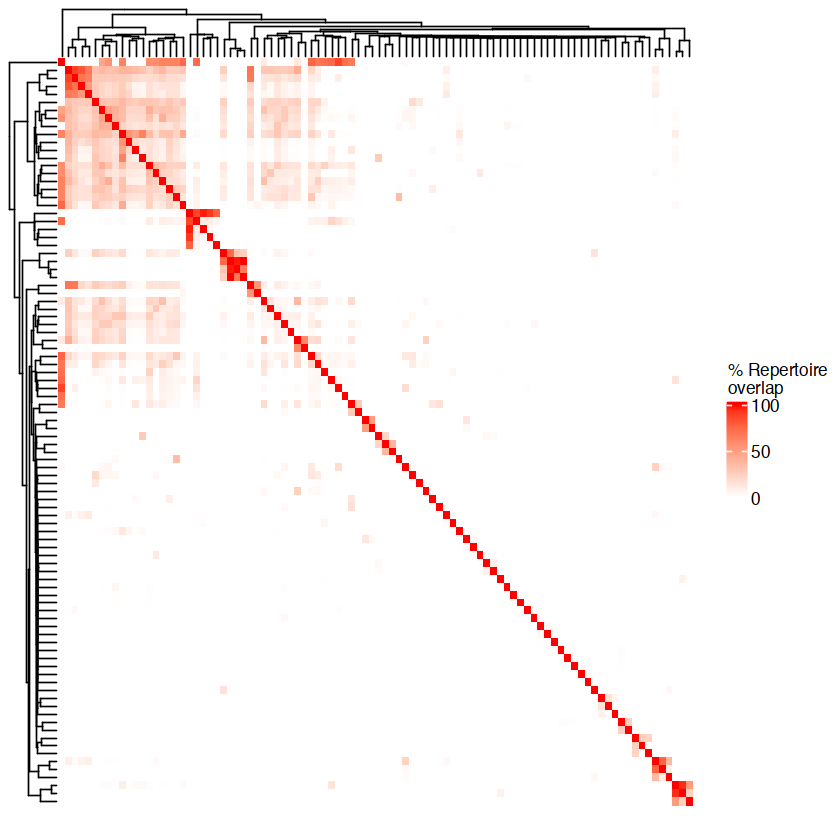

In [94]:
myorder <- row_order(draw(hm1))

In [95]:
pdf(paste0(plotpath, "pairwise_overlap.pdf"),
    width = 12, height = 12
)
draw(hm1, heatmap_legend_side = "right")
dev.off()


pdf 
  2

In [84]:
mymat_clust <- (cfdna_mat_subset[myorder, myorder])

In [228]:
head(mymat_clust_top20)

,CHP_392-03_cfDNA,CHP_388-02_cfDNA,CHP_380-05_cfDNA,CHP_364-04-cfDNA,CHP_390-02_cfDNA,CHP_367-04_cfDNA,CHP_392-02_cfDNA,CHP_382-05_cfDNA,CHP_334-03_cfDNA,CHP_404-02_cfDNA,CHP_362-02_cfDNA,CHP_385-04_cfDNA,CHP_411-02_cfDNA,CHP_341-02_cfDNA,CHP_375-05_cfDNA,CHP_388-05_cfDNA,CHP_404-05_cfDNA,CHP_407-02_cfDNA
CHP_392-03_cfDNA,100.00000,88.70857,82.64829,67.27472,32.23784,36.20781,32.50139,32.82188,39.65175,38.34840,35.141281,31.237156,22.95816,31.84243,36.52673,25.88049,26.36661,28.487823
CHP_388-02_cfDNA,88.70857,100.00000,70.22801,64.16788,27.47425,27.24906,26.66845,27.68154,26.79251,24.67785,19.744782,16.980975,17.31399,19.00498,23.29692,17.97571,17.52290,14.903706
CHP_380-05_cfDNA,82.64829,70.22801,100.00000,52.78149,27.68106,22.21402,17.95518,21.40232,26.35786,16.26120,6.386067,4.868421,15.46530,11.62910,13.94601,14.98967,14.53267,3.790460
CHP_364-04-cfDNA,67.27472,64.16788,52.78149,100.00000,28.04223,21.61052,17.85777,21.35283,26.79030,21.06097,7.374444,5.397331,15.63990,11.80242,8.63556,15.28776,15.15921,4.136397
CHP_390-02_cfDNA,32.23784,27.47425,27.68106,28.04223,100.00000,31.09282,29.31491,31.02026,36.42090,28.24607,26.183621,30.090066,29.05738,28.25828,22.87118,29.58802,22.50388,28.176956
CHP_367-04_cfDNA,36.20781,27.24906,22.21402,21.61052,31.09282,100.00000,47.49669,41.31596,34.40938,21.61974,20.835104,21.670352,41.24569,29.01683,32.10729,30.80387,26.57548,19.721663


In [231]:
temp <- (as.vector(unlist(mymat_clust_top20)))

In [232]:
temp <- temp[ temp < 100]

In [233]:
summary(temp)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.79   15.64   22.21   24.42   29.69   88.71 

In [227]:
dim(mymat_clust_top20)

[1] 18 18

In [96]:
mymat_clust_top20 <- mymat_clust[2:19, 2:19]

In [97]:
hm2 <- Heatmap(mymat_clust_top20, name = "Pairwise overlap", row_names_gp = gpar(fontsize = 10), show_row_names = TRUE,
column_names_gp = gpar(fontsize = 1), cluster_rows = FALSE, cluster_columns = FALSE)

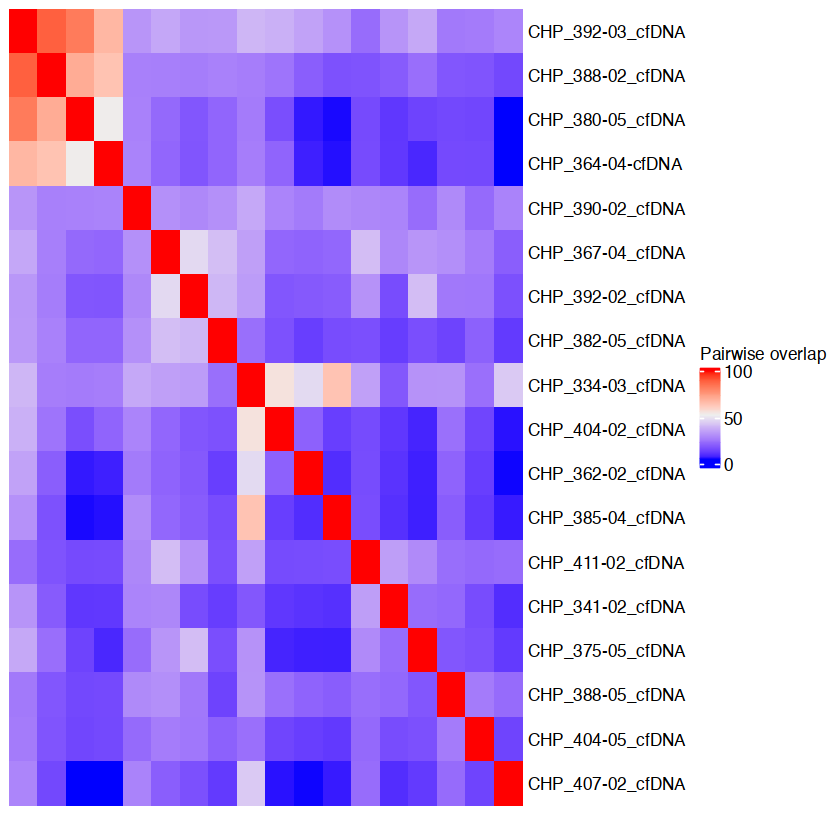

In [98]:
hm2

Calculate overlap between pre vs post chemo

In [99]:
head(meta_div)

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,estimated_Shannon,SE_Shannon,observed_Simpson,estimated_Simpson,SE_Simpson,basename,file,sampletype,Group,log10shann
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
302,CHP_319_05,CHP_319,X05,1.2,0.00,1,HR ALL,1.2,0,NA,...,13.439,1.217,10.248,11.626,1.269,CHP_319-05-PBMC-DNA,batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_319-05-PBMC-DNA.txt,PBMC,CHP,1.074743
320,CHP_323_03,CHP_323,X03,0.0,786.24,1,HR ALL,0.0,0,NA,...,37.986,0.367,33.204,33.544,0.638,CHP_323-03-PBMC-DNA,batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_323-03-PBMC-DNA.txt,PBMC,CHP,1.576595
322,CHP_323_05,CHP_323,X05,0.0,979.50,1,HR ALL,0.0,0,NA,...,85.174,2.255,32.669,33.190,2.327,CHP_323-05-PBMC-DNA,batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_323-05-PBMC-DNA.txt,PBMC,CHP,1.912504
327,CHP_324_05,CHP_324,X05,0.0,0.00,12,T-ALL,0.0,0,NA,...,130.246,0.574,79.994,80.126,0.912,CHP_324-05_PBMC-DNA,remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_324-05_PBMC-DNA.txt,PBMC,CHP,2.113673
346,CHP_328_04,CHP_328,X04,0.0,130.82,7,SR ALL,0.0,0,NA,...,224.003,0.477,133.121,133.198,0.669,CHP-328-04-PBMC-DNA,remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-328-04-PBMC-DNA.txt,PBMC,CHP,2.349757
347,CHP_328_05,CHP_328,X05,0.0,91.16,7,SR ALL,0.0,0,NA,...,87.712,0.563,62.759,62.967,0.625,CHP-328-05-PBMC-DNA,remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-328-05-PBMC-DNA.txt,PBMC,CHP,1.941119


In [100]:
mypats <- unique(meta_div$Patient)

In [101]:
pat_df <- as.data.frame(matrix(NA,
    nrow = length(mypats),
    ncol = 12,
    dimnames = list(mypats, c(
        "PBMC_X02", "PBMC_X03", "PBMC_X04", "PBMC_X05",
        "cfDNA_X02", "cfDNA_X03", "cfDNA_X04", "cfDNA_X05", 
        "cancergroup", "Disease_type", "Age", "Relapse"
    ))
))


In [102]:
head(mymat)

,CHP_319-05-PBMC-DNA,CHP_323-03-PBMC-DNA,CHP_323-05-PBMC-DNA,CHP_324-05_PBMC-DNA,CHP-328-04-PBMC-DNA,CHP-328-05-PBMC-DNA,CHP_330-05-PBMC-DNA,CHP_331-04-PBMC-DNA,CHP_331-05-PBMC-DNA,CHP_335-03-PBMC-DNA,...,CHP_389-FFPE-DNA_S1,CHP_390-FFPE-DNA_S9,CHP_394-FFPE-DNA_S4,CHP_400-FFPE-DNA_S1,CHP_401-FFPE-DNA_S1,CHP_404_A-FFPE-DNA,CHP_404_B-FFPE-DNA,CHP_407-FFPE-DNA_S7,CHP_412-FFPE-DNA_S1,CHP_418-FFPE-DNA_S2
CHP_319-05-PBMC-DNA,100,0,0,0,0.0000000,0.0000000,0,0,0,0.0000000,...,0,0,0,0,0,0,0,0,0,0
CHP_323-03-PBMC-DNA,0,100,0,0,0.0000000,0.0000000,0,0,0,0.0000000,...,0,0,0,0,0,0,0,0,0,0
CHP_323-05-PBMC-DNA,0,0,100,0,0.0000000,0.0000000,0,0,0,0.0000000,...,0,0,0,0,0,0,0,0,0,0
CHP_324-05_PBMC-DNA,0,0,0,100,0.0000000,0.0000000,0,0,0,0.0000000,...,0,0,0,0,0,0,0,0,0,0
CHP-328-04-PBMC-DNA,0,0,0,0,100.0000000,0.8885397,0,0,0,0.1455496,...,0,0,0,0,0,0,0,0,0,0
CHP-328-05-PBMC-DNA,0,0,0,0,0.8885397,100.0000000,0,0,0,0.0000000,...,0,0,0,0,0,0,0,0,0,0


In [103]:
# change hyphen to underscore
rownames(mymat) <- gsub("-", "_", rownames(mymat))
colnames(mymat) <- gsub("-", "_", colnames(mymat))

In [104]:
for (i in 1:nrow(pat_df)) {
    pat <- rownames(pat_df)[i]
    mymat_pat <- mymat[grepl(pat, rownames(mymat)), grepl(pat, colnames(mymat))]
    if (length(mymat_pat) == 1) {
        next
    }
    if (sum(grepl("_01_PBMC", rownames(mymat_pat))) > 0) {
        pre <- mymat_pat[, which(grepl("_01_PBMC", colnames(mymat_pat)))]
        if (sum(grepl("_02_PBMC", colnames(mymat_pat))) == 1) {
            pat_df[pat, "PBMC_X02"] <- pre[which(grepl("_02_PBMC", names(pre)))]
        }
        if (sum(grepl("_03_PBMC", colnames(mymat_pat))) == 1) {
            pat_df[pat, "PBMC_X03"] <- pre[which(grepl("_03_PBMC", names(pre)))]
        }
        if (sum(grepl("_04_PBMC", colnames(mymat_pat))) == 1) {
            pat_df[pat, "PBMC_X04"] <- pre[which(grepl("_04_PBMC", names(pre)))]
        }
        if (sum(grepl("_05_PBMC", colnames(mymat_pat))) == 1) {
            pat_df[pat, "PBMC_X05"] <- pre[which(grepl("_05_PBMC", names(pre)))]
        }
    }

    if (sum(grepl("_01_cfDNA", rownames(mymat_pat))) > 0) {
        pre <- mymat_pat[, which(grepl("_01_cfDNA", colnames(mymat_pat)))]
        if (sum(grepl("_02_cfDNA", colnames(mymat_pat))) == 1) {
            pat_df[pat, "cfDNA_X02"] <- pre[which(grepl("_02_cfDNA", names(pre)))]
        }
        if (sum(grepl("_03_cfDNA", colnames(mymat_pat))) == 1) {
            pat_df[pat, "cfDNA_X03"] <- pre[which(grepl("_03_cfDNA", names(pre)))]
        }
        if (sum(grepl("_04_cfDNA", colnames(mymat_pat))) == 1) {
            pat_df[pat, "cfDNA_X04"] <- pre[which(grepl("_04_cfDNA", names(pre)))]
        }
        if (sum(grepl("_05_cfDNA", colnames(mymat_pat))) == 1) {
            pat_df[pat, "cfDNA_X05"] <- pre[which(grepl("_05_cfDNA", names(pre)))]
        }
    }
}


In [105]:
pat_df$cancergroup <- meta_div[match(rownames(pat_df), meta_div$Patient), "cancergroup"]
pat_df$Disease_type <- meta_div[match(rownames(pat_df), meta_div$Patient), "Disease_type"]
pat_df$Age <- meta_div[match(rownames(pat_df), meta_div$Patient), "Age"]
pat_df$Relapse <- meta_div[match(rownames(pat_df), meta_div$Patient), "Relapse"]

In [106]:
pat_df_long <- tidyr::pivot_longer(pat_df, cols = c("PBMC_X02", "PBMC_X03", "PBMC_X04", "PBMC_X05", "cfDNA_X02", "cfDNA_X03", "cfDNA_X04", "cfDNA_X05"), names_to = "Sample", values_to = "Overlap")

In [107]:
pat_df_long <- pat_df_long[!is.na(pat_df_long$Overlap),]

In [108]:
pat_df_long$sampletype <- NA
pat_df_long$sampletype[ grepl("cfDNA", pat_df_long$Sample)] <- "cfDNA"
pat_df_long$sampletype[ grepl("PBMC", pat_df_long$Sample)] <- "PBMC"

In [109]:
head(pat_df_long)

cancergroup,Disease_type,Age,Relapse,Sample,Overlap,sampletype
<chr>,<chr>,<dbl>,<int>,<chr>,<dbl>,<chr>
Solid tumors,EWS,8,0,cfDNA_X02,0,cfDNA
Solid tumors,EWS,8,0,cfDNA_X04,0,cfDNA
Solid tumors,EWS,8,0,cfDNA_X05,0,cfDNA
Lymphoma,BL,6,0,cfDNA_X02,0,cfDNA
Lymphoma,BL,6,0,cfDNA_X03,0,cfDNA
Lymphoma,BL,6,0,cfDNA_X04,0,cfDNA


In [110]:
t.test(pat_df_long$Overlap[ pat_df_long$sampletype == "PBMC"] ~
factor(pat_df_long$Relapse[ pat_df_long$sampletype == "PBMC"]))


	Welch Two Sample t-test

data:  pat_df_long$Overlap[pat_df_long$sampletype == "PBMC"] by factor(pat_df_long$Relapse[pat_df_long$sampletype == "PBMC"])
t = -0.51802, df = 8.089, p-value = 0.6183
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -4.642677  2.936780
sample estimates:
mean in group 0 mean in group 1 
       1.713944        2.566893 


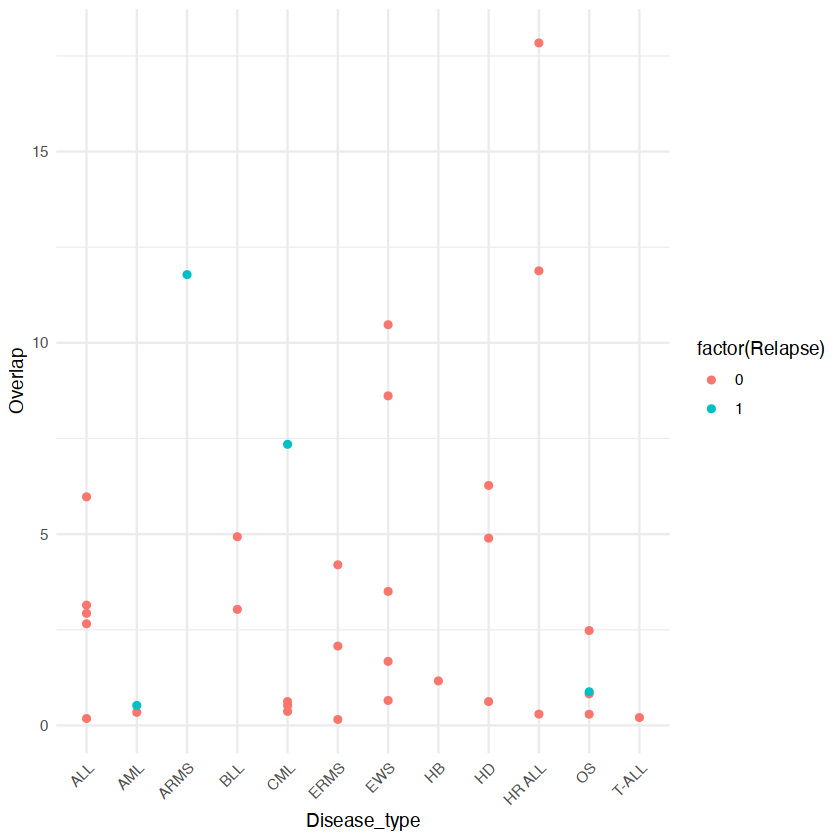

In [111]:
ggplot(
    data = pat_df_long[ pat_df_long$Overlap > 0 & pat_df_long$sampletype == "PBMC", ],
    aes(x = Disease_type, y = Overlap, color = factor(Relapse))
) +
    geom_point() +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))


Clonetrack samples with high % overlap

In [113]:
head(mymat_clust_top20)

,CHP_392-03_cfDNA,CHP_388-02_cfDNA,CHP_380-05_cfDNA,CHP_364-04-cfDNA,CHP_390-02_cfDNA,CHP_367-04_cfDNA,CHP_392-02_cfDNA,CHP_382-05_cfDNA,CHP_334-03_cfDNA,CHP_404-02_cfDNA,CHP_362-02_cfDNA,CHP_385-04_cfDNA,CHP_411-02_cfDNA,CHP_341-02_cfDNA,CHP_375-05_cfDNA,CHP_388-05_cfDNA,CHP_404-05_cfDNA,CHP_407-02_cfDNA
CHP_392-03_cfDNA,100.00000,88.70857,82.64829,67.27472,32.23784,36.20781,32.50139,32.82188,39.65175,38.34840,35.141281,31.237156,22.95816,31.84243,36.52673,25.88049,26.36661,28.487823
CHP_388-02_cfDNA,88.70857,100.00000,70.22801,64.16788,27.47425,27.24906,26.66845,27.68154,26.79251,24.67785,19.744782,16.980975,17.31399,19.00498,23.29692,17.97571,17.52290,14.903706
CHP_380-05_cfDNA,82.64829,70.22801,100.00000,52.78149,27.68106,22.21402,17.95518,21.40232,26.35786,16.26120,6.386067,4.868421,15.46530,11.62910,13.94601,14.98967,14.53267,3.790460
CHP_364-04-cfDNA,67.27472,64.16788,52.78149,100.00000,28.04223,21.61052,17.85777,21.35283,26.79030,21.06097,7.374444,5.397331,15.63990,11.80242,8.63556,15.28776,15.15921,4.136397
CHP_390-02_cfDNA,32.23784,27.47425,27.68106,28.04223,100.00000,31.09282,29.31491,31.02026,36.42090,28.24607,26.183621,30.090066,29.05738,28.25828,22.87118,29.58802,22.50388,28.176956
CHP_367-04_cfDNA,36.20781,27.24906,22.21402,21.61052,31.09282,100.00000,47.49669,41.31596,34.40938,21.61974,20.835104,21.670352,41.24569,29.01683,32.10729,30.80387,26.57548,19.721663


In [304]:
mysamples <- rownames(mymat_clust_top20 )

In [305]:
myfiles <- meta_div$file[ meta_div$basename %in% mysamples]

In [306]:
cdr3df <- cdr3_dataframe.fx(h4hpath, "TRB", myfiles, "inframe")

my files:



 [1] "batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_334-03_cfDNA.txt"               
 [2] "batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_341-02_cfDNA.txt"               
 [3] "remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_362-02_cfDNA.txt"   
 [4] "remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_364-04-cfDNA.txt"   
 [5] "batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_367-04_cfDNA.txt"               
 [6] "batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_375-05_cfDNA.txt"               
 [7] "priority_pool2/mixcr/clones/CLONES_TRBCHP_380-05_cfDNA.txt"                        
 [8] "batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_382-05_cfDNA.txt"               
 [9] "remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_385-04_cfDNA.txt"   
[10] "cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_388-02_cfDNA.txt"
[11] "batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_388-05_cfDNA.txt"               
[12] "batc

Total recovered clonotypes:



[1] 1057


Total out-of-frame clonotypes:



[1] 292


Total clonotypes with stop codon:



[1] 26


Total productive clonotypes:



[1] 739


Output contains in_frame clonotypes only



In [307]:
tmp <- meta_div[meta_div$basename %in% mysamples,]

In [315]:
tmp1 <- tmp[order(tmp$Relapse),]

In [316]:
tmp1[, c("basename","Relapse")]

,basename,Relapse
,<chr>,<int>
12,CHP_334-03_cfDNA,0
29,CHP_341-02_cfDNA,0
92,CHP_362-02_cfDNA,0
110,CHP_367-04_cfDNA,0
135,CHP_375-05_cfDNA,0
157,CHP_382-05_cfDNA,0
166,CHP_385-04_cfDNA,0
177,CHP_388-02_cfDNA,0
180,CHP_388-05_cfDNA,0


In [318]:
rel <- tmp1$basename[ tmp1$Relapse == 1]
norel <- tmp1$basename[ tmp1$Relapse == 0]

In [319]:
cdr3df$samplename <- factor(cdr3df$samplename, levels = tmp1$basename)

In [320]:
set.seed(123)
# CDR3_fraction <- cdr3df[, c("samplename", "nSeqCDR3", "cloneFraction", "cloneCount")]
cdr3df_rel <- cdr3df[cdr3df$samplename %in% rel,]
cdr3df_norel <- cdr3df[cdr3df$samplename %in% norel,]
# Assign colors to recurring nt clonotypes
recurring <- unique(cdr3df$nSeqCDR3[duplicated(cdr3df$nSeqCDR3)])
notrecurring <- cdr3df$nSeqCDR3[!cdr3df$nSeqCDR3 %in% recurring]

In [322]:
length(recurring)

[1] 146

In [334]:
mytab <- as.data.frame.matrix(table(cdr3df$nSeqCDR3, cdr3df$samplename))

In [336]:
mytab$n <- rowSums(mytab)

In [337]:
mytab$n_rel <- rowSums(mytab[ , rel])

In [345]:
dim(mytab)

[1] 477  20

In [339]:
mytab_common <- mytab[ mytab$n > 1,]

In [343]:
length(mytab_common$n_rel[ mytab_common$n_rel > 1] )

[1] 7

In [346]:
head(mytab_common)

,CHP_334-03_cfDNA,CHP_341-02_cfDNA,CHP_362-02_cfDNA,CHP_367-04_cfDNA,CHP_375-05_cfDNA,CHP_382-05_cfDNA,CHP_385-04_cfDNA,CHP_388-02_cfDNA,CHP_388-05_cfDNA,CHP_392-02_cfDNA,CHP_392-03_cfDNA,CHP_404-02_cfDNA,CHP_404-05_cfDNA,CHP_407-02_cfDNA,CHP_364-04-cfDNA,CHP_380-05_cfDNA,CHP_390-02_cfDNA,CHP_411-02_cfDNA,n,n_rel
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
TGCACCAGCAGCCAAGATGTTTGTGCCGTCACCCCGCGAATCTACAATGAGCAGTTCTTC,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,3,0
TGCAGCGCCCCGGACAGGGAATCCTACGAGCAGTACTTC,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,4,0
TGCAGCGCCCTGACAGGAAATTACTATGGCTACACCTTC,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0
TGCAGCGTTGCGGGGGGTCCGAACACCGGGGAGCTGTTTTTT,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0
TGCAGCGTTGGGAAAACAGGGCGCGCTAACCGGCTGAACACTGAAGCTTTCTTT,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,3,1
TGCAGCGTTGTGGGGGCAGTAGCTTTCTTT,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,1


In [347]:
recurring <- rownames(mytab_common)[ mytab_common$n_rel > 1]
others <- rownames(mytab)[ ! rownames(mytab) %in% recurring]

In [351]:
head(others)

[1] "CCTCCCCGGTGGGGGGGCACAGATACGCAGTATTTT"                        
[2] "TATGCCAGCAGCTTAACCGAGACAGGAGACACCGGGGAGCTGTTTTTT"            
[3] "TGCACCAGCAGCCAAGATGTTTGTGCCGTCACCCCGCGAATCTACAATGAGCAGTTCTTC"
[4] "TGCAGCGACCTTACAGGGGGGAACACTGAAGCTTTCTTT"                     
[5] "TGCAGCGCCCCGGACAGGGAATCCTACGAGCAGTACTTC"                     
[6] "TGCAGCGCCCTGACAGGAAATTACTATGGATACACCTTC"

In [360]:
myColors <- distinctColorPalette(7)
myColors <- c(myColors, rep("white", length(others)))
names(myColors) <- c(recurring, others)

In [ ]:
head(myColors)

[1] "#D6CE7A" "#C158D8" "#D97777" "#98E665" "#A194D6" "#87DDC4"

: 

In [ ]:
# if (length(recurring) > 50) {
#     recurring_df <- CDR3_fraction[CDR3_fraction$nSeqCDR3 %in% recurring, ]
#     recurringcdr3_ordered <- unique(recurring_df$nSeqCDR3[order(recurring_df$cloneCount, decreasing = TRUE)])
#     message("Total number of recurring clonotypes > 50 ")
#     message("Tracking top 20 recurring clonotypes ")
#     myColors <- distinctColorPalette(20)

#     myColors <- c(myColors, rep("white", length(recurring) - 20), rep("white", length(notrecurring)))
#     names(myColors) <- c(recurringcdr3_ordered, notrecurring)
# }

# myColors <- distinctColorPalette(length(recurring))
# myColors <- c(myColors, rep("white", length(notrecurring)))
# names(myColors) <- c(recurring, notrecurring)


In [357]:
p <-  ggplot(CDR3_fraction, aes(x = samplename,
                                  y = cloneFraction,
                                  fill = nSeqCDR3,
                                  stratum = nSeqCDR3,
                               #   alluvium = nSeqCDR3,
                                  label = nSeqCDR3))

In [358]:


  myp <- p + #geom_alluvium(decreasing = FALSE) +
    geom_stratum(decreasing = FALSE, stat = "stratum") +
    scale_fill_manual(breaks = names(myColors[myColors != "white"]),
                      values = myColors) +
    theme(axis.title.y = element_text(size = 15),
          axis.title.x = element_blank(),
          axis.line = element_line(color = "black"),
          axis.text = element_text(size = 15),
          axis.text.x = element_text(angle = 45, hjust = 1),
          plot.title = element_text(size = 15, hjust = 0.5)) +
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.background = element_rect(fill = "transparent",colour = NA),
          legend.key = element_rect(fill = "white", colour = "white"),
          legend.position = "none",
          plot.margin = unit(c(0.2,0,0,0),"cm")) 

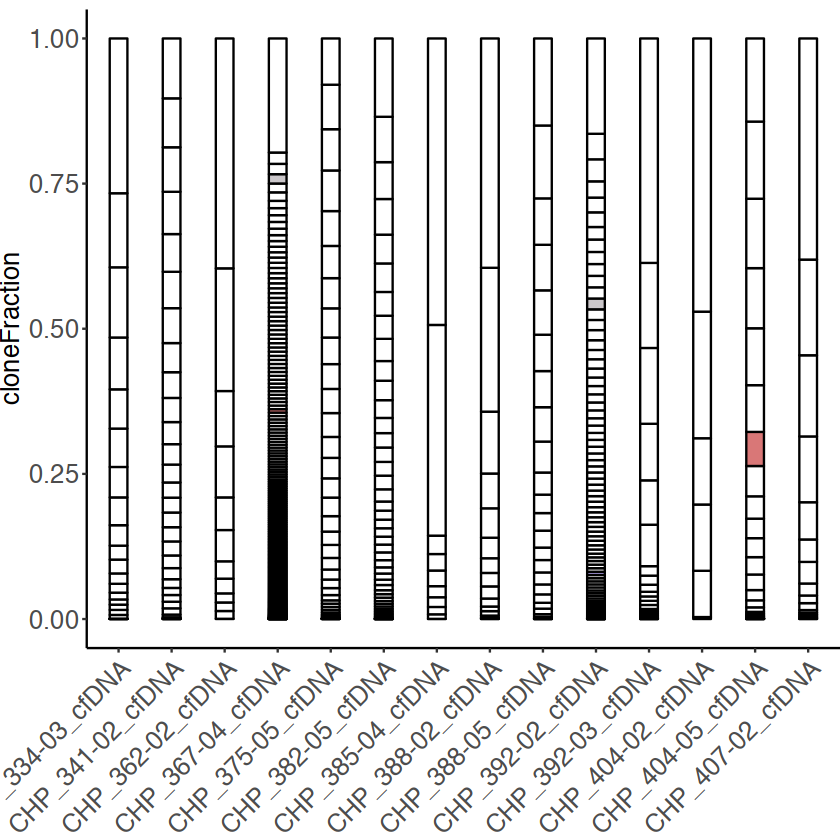

In [359]:
myp

In [291]:
# clonetrack_p <- clonetrack[[1]]
color_tcrs <- as.data.frame(myColors)

In [292]:
colnames(color_tcrs)[1] <- "color"

In [293]:
color_tcrs$aaSeqCDR3 <- NA
color_tcrs$aaSeqCDR3 <- cdr3df$aaSeqCDR3[match(rownames(color_tcrs), cdr3df$nSeqCDR3)]

In [303]:
color_tcrs[color_tcrs$aaSeqCDR3 == "CASSFGGAPDTQYF",]

,color,aaSeqCDR3
,<chr>,<chr>
TGCGCCAGCAGCTTCGGGGGGGCCCCAGATACGCAGTATTTT,white,CASSFGGAPDTQYF


In [281]:
(color_tcrs)

,color,aaSeqCDR3
,<chr>,<chr>
TGTGCCAGCAGTTTAGGGAGGAATCAGCCCCAGCATTTT,#93DBCD,CASSLGRNQPQHF
TGTGCCAGCAGTCCGGACAGGGGGCGTTACCAAGAGACCCAGTACTTC,#D96D62,CASSPDRGRYQETQYF
TGTGCCAGTAGTAGATTCGCAGGGGGCTCTGGAAACACCATATATTTT,#D7A9C5,CASSRFAGGSGNTIYF
TGTGCCAGCAGCCACGACAGGGAACAAGAGACCCAGTACTTC,#D5CD92,CASSHDREQETQYF
TGTGCCAGCAGCTTCTTAGGTGGGGGCAGCGATGAGCAGTTCTTC,#C15DD9,CASSFLGGGSDEQFF
TGTGCCAGTAGTATCGGCAGGAATAGCAATCAGCCCCAGCATTTT,#8595D6,CASSIGRNSNQPQHF
TGCGCCAGCAGCTTCGGGGGGGCCCCAGATACGCAGTATTTT,#A4E368,CASSFGGAPDTQYF
TGTGCCAGCTCACCAGGAGAGGGAAATCAAGCTTTCTTT,white,CASSPGEGNQAFF
TGTGCCATCAGTCGGACGAAAGAACCCAATGAAAAACTGTTTTTT,white,CAISRTKEPNEKLFF


In [282]:
pdf(paste0(plotpath, "clonetrack_highoverlap_cfdna_relapse.pdf"),
    width = 12, height = 6
)
myp + theme(axis.text.x = element_text(angle = 45, hjust = 1))
dev.off()

pdf 
  2

In [283]:
pdf(paste0(plotpath, "lgd_clonetrack_highoverlap_cfdna_relapse.pdf"),
    width = 12, height = 12
)
grid.draw(cowplot::get_legend(myp + theme(legend.position = "right") +
    scale_fill_manual(
        breaks = rownames(color_tcrs)[color_tcrs$color != "white"],
        values = color_tcrs$color, labels = color_tcrs$aaSeqCDR3[color_tcrs$color != "white"]
    )))

dev.off()


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


pdf 
  2

# Sankey plot

In [ ]:
dim(int_all)

In [ ]:
int_all$basename_tcr <- paste0(int_all$basename, "_", int_all$aaSeqCDR3)

In [ ]:
sankey_rows <- data.frame(int_all[, c("basename_tcr", "basename", "aaSeqCDR3", "Patient", "sampletype")])

In [ ]:
sankey_rows$all <- "All"

In [ ]:
head(sankey_rows)

In [ ]:
mytb <- as.data.frame(table(sankey_rows$aaSeqCDR3))

In [ ]:
nrow(mytb) # total unique sequences

nrow(mytb[mytb$Freq > 1,]) # total sequences that occur more than once

In [ ]:
2262 / 50514 * 100

In [ ]:
summary(mytb$Freq[mytb$Freq > 1])

In [ ]:
tail(sankey_rows)

In [ ]:
uniquetcrs <- unique(int_all$aaSeqCDR3)

In [ ]:
length(uniquetcrs)

In [ ]:
dim(int_all)

In [ ]:
sankey_rows$unique_tcr <- NA
sankey_rows$unique_tcr[!sankey_rows$aaSeqCDR3 %in% dups$aaSeqCDR3] <- "Found once"
sankey_rows$unique_tcr[sankey_rows$aaSeqCDR3 %in% dups$aaSeqCDR3] <- "Found more than once"

In [ ]:
table(sankey_rows$unique_tcr)

In [ ]:
head(public)

In [ ]:
sankey_rows$public_tcr <- NA
sankey_rows$public_tcr[sankey_rows$aaSeqCDR3 %in% public] <- "Public"
sankey_rows$public_tcr[!sankey_rows$aaSeqCDR3 %in% public] <- NA

In [ ]:
dim(tcr_pat_tab)

In [ ]:
sankey_rows$public_tcr[sankey_rows$aaSeqCDR3 %in% patient_specific] <- "patient_specific"

In [ ]:
# #factor tcr_pat_tab_df$name
# tcr_pat_tab_df$name <- factor(tcr_pat_tab_df$name, levels = c("Total", "Unique", "Public", "Patient-specific"))

In [ ]:
table(sankey_rows$public_tcr)

In [ ]:
head(sankey_rows)

In [ ]:
sankey_rows$db_annot <- tcr_pat_tab$db_annot[ match(sankey_rows$aaSeqCDR3, rownames(tcr_pat_tab))]

In [ ]:
# dummy input
sankey_rows$db_annot <- NA
sankey_rows$db_annot[which(sankey_rows$public_tcr == "Public")][1:10] <- "HomoSap"
sankey_rows$db_annot[which(sankey_rows$public_tcr == "Public")][11:25] <- "Viral"

In [ ]:
# write.csv(unique(sankey_rows$aaSeqCDR3[ which(sankey_rows$public_tcr == "patient_specific")]), paste0("~/Downloads/sankey_rows_patient_specific.csv"), row.names = F)

# write.csv(unique(sankey_rows$aaSeqCDR3[ which(sankey_rows$public_tcr == "Public")]), paste0("~/Downloads/sankey_rows_public.csv"), row.names = F)

In [ ]:
df <- make_long(sankey_rows, all, unique_tcr, public_tcr, db_annot)

In [ ]:
# df$next_node <- factor(df$next_node, levels = c('ALCL','BL','BLL','DLBCL','ERMS','HD',
#                                       'Lymphoma','n = 4','n = 17','n = 2','n = 23',
#                                       'n = 21','n = 25','NB','OS','PMBCL','Solid'))

# df$node <- factor(df$node, levels = c('ALCL','BL','BLL','DLBCL','ERMS','HD',
#                                       'Lymphoma','n = 4','n = 17','n = 2','n = 23',
#                                       'n = 21','n = 25','NB','OS','PMBCL','Solid'))

In [ ]:
# library(randomcoloR)
# set.seed(5250)
# myColors <- distinctColorPalette(17)
# names(myColors) <- levels(factor(df$node))

In [ ]:
# #failed samples color grey
# myColors["n = 2"] <- "grey"
# myColors["n = 4"] <- "grey"

In [ ]:
# # Tumor types white
# myColors[names(myColors) %in% c("ALCL", "BL", "BLL", "DLBCL", "ERMS", "HD", "PMBCL", "NB", "OS")] <- "white"

In [ ]:
head(df)

In [ ]:
sankey <- ggplot(df, aes(x = x, 
               next_x = next_x, 
               node = node, 
               next_node = next_node,
               fill = node, #color = node,
               label = node#, fill.node = node
               )) +
  geom_sankey(flow.alpha = 0.5, na.rm = TRUE, node.color = "black") +
  theme_sankey(base_size = 16) +
  geom_sankey_label(size = 5, hjust = 0.5,# vjust = 0.2,
                    color = 1, label.size = 0,
                    fill = alpha("white",0), na.rm = TRUE) +
theme(legend.position = "none", 
      axis.title.x = element_blank(),
      axis.text.x = element_text(size = 20, color = "black"),
     plot.title = element_text(hjust = 0.5, size = 30)) 
#scale_fill_manual(values = myColors, na.value="white")+
#scale_color_manual(values = myColors, na.value="white") +
# labs(title = "Tumor sample processing")

In [ ]:
sankey

In [ ]:
pdf(paste0(plotpath, "tcr_sankey.pdf"),
   width = 12, height = 6)
sankey
dev.off()

PCA

In [109]:
tail(int_all)

,cloneId,cloneCount,cloneFraction,clonalSequence,clonalSequenceQuality,allVHitsWithScore,allDHitsWithScore,allJHitsWithScore,allCHitsWithScore,allVAlignments,...,aaSeqFR2,aaSeqCDR2,aaSeqFR3,aaSeqCDR3,aaSeqFR4,refPoints,file,basename,Patient,sampletype
,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<lgl>,<lgl>,<lgl>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>
175100,667,4,0.000113215,TGTGCCAGCTCACCAGGACAGGGGATTCTGGCCCTTCAAGAGACCCAGTACTTC,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,TRBV18*00(330),TRBD1*00(45),TRBJ2-5*00(230),NA,702|717|739|0|15||75.0,...,NA,NA,NA,CASSPGQGILALQETQYF,NA,:::::::::0:-2:15:15:-1:-2:24:36:-2:54:::,batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_412-FFPE-DNA_S1.txt,CHP_412-FFPE-DNA_S1,CHP_412,Tumor
17809,0,530,0.552659020,TGTGCCAGTAGTATTCCCAGGCCCAGCAATCAGCCCCAGCATTTT,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,TRBV19*00(723.6),TRBD2*00(25),TRBJ1-5*00(117.8),NA,559|573|596|0|14||70.0,...,NA,NA,NA,CASSIPRPSNQPQHF,NA,:::::::::0:-3:14:19:-14:3:24:24:-1:45:::,batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_418-FFPE-DNA_S2.txt,CHP_418-FFPE-DNA_S2,CHP_418,Tumor
22595,5,157,0.163712200,TGCAGTGGCCTCAGCCGCGAACCTGACTCTGGAAACACCATATATTTT,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,TRBV20-1*00(317.5),,TRBJ1-3*00(251),NA,759|766|793|0|7||35.0,...,NA,NA,NA,CSGLSREPDSGNTIYF,NA,:::::::::0:-7:7:::::26:0:48:::,batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_418-FFPE-DNA_S2.txt,CHP_418-FFPE-DNA_S2,CHP_418,Tumor
31774,6,141,0.147028154,TGTGCCAGCAGCTTTGGAGGGGATTTCGTGGCGAATGAGCAGTTCTTC,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,"TRBV7-6*00(386.8),TRBV7-7*00(349.6)",TRBD2*00(30),TRBJ2-1*00(214.6),NA,576|590|613|0|14||70.0;585|599|622|0|14||70.0,...,NA,NA,NA,CASSFGGDFVANEQFF,NA,:::::::::0:-3:14:15:-10:0:21:33:-7:48:::,batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_418-FFPE-DNA_S2.txt,CHP_418-FFPE-DNA_S2,CHP_418,Tumor
41597,10,105,0.109489051,TGTGCCAGCAGTCCCCCGGCCGGCCGAAACACAGATACGCAGTATTTT,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,TRBV27*00(1191.6),"TRBD1*00(25),TRBD2*00(25)",TRBJ2-3*00(127.5),NA,556|568|593|0|12||60.0,...,NA,NA,NA,CASSPPAGRNTDTQYF,NA,:::::::::0:-5:12:12:11:-18:17:29:-2:48:::,batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_418-FFPE-DNA_S2.txt,CHP_418-FFPE-DNA_S2,CHP_418,Tumor
51492,16,25,0.026068822,TGTGCCAGCAGTGAGCGGGGCGGGGGCAACTACGAGCAGTACTTC,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,TRBV2*00(92.8),TRBD1*00(30),TRBJ2-7*00(219.3),NA,518|532|555|0|14||70.0,...,NA,NA,NA,CASSERGGGNYEQYF,NA,:::::::::0:-3:14:21:-6:0:27:29:-3:45:::,batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_418-FFPE-DNA_S2.txt,CHP_418-FFPE-DNA_S2,CHP_418,Tumor


In [171]:
summary(int_all$cloneCount[grepl("PBMC", int_all$basename)])

summary(int_all$cloneCount[grepl("cfDNA", int_all$basename)])

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    1.00     8.00    25.00    98.36    96.00 50649.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    16.0   118.0   460.9   560.0 66879.0 

In [217]:
int_all_subset <- int_all[ grepl("PBMC", int_all$basename),]
int_all_subset <- int_all_subset[ int_all_subset$cloneCount > 25,]

In [218]:
int_mat <- xtabs(cloneCount ~ aaSeqCDR3 + basename, data = int_all_subset) 

In [219]:
int_mat <- as.data.frame.matrix(int_mat)

In [220]:
int_mat_t <- t(int_mat)

In [221]:
dim(int_mat_t)

[1]   186 23886

In [222]:
mymaxes <- apply(int_mat_t, 2, max)

In [223]:
int_mat_t_norm <- sweep(int_mat_t, MARGIN = 2, STATS = mymaxes, FUN = "/")

In [224]:
set.seed(123)
pca <- prcomp(int_mat_t_norm, center = T, scale. = T)

In [225]:
p1 <- factoextra::fviz_pca_ind(pca,
     #col.ind = as.vector(df_narm$cancergroup),
    # gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
    # remove labels
    label = "none",
    repel = TRUE, addEllipses = FALSE, mean.point = FALSE
)

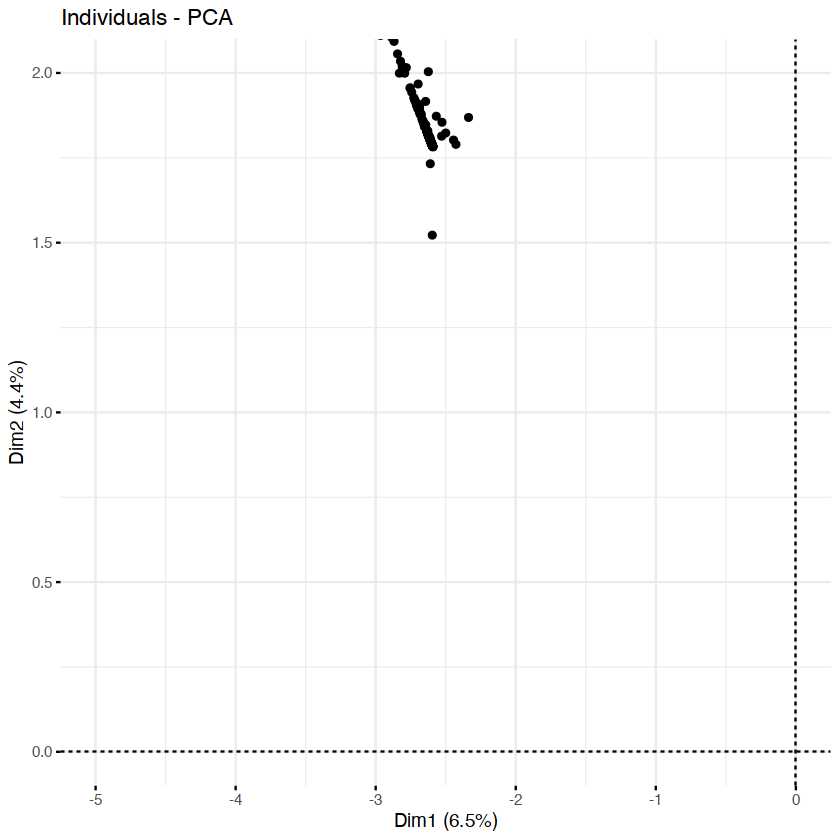

In [228]:
p1+ coord_cartesian(xlim = c(-5,0), ylim = c(0,2))